# Проект: Исследование стартапов

Автор: Геннадий Гордиевский

Дата: 01.01.2025

## Введение

### Описание данных


Нам представленны данные о стартапах, которые финансовая компания планирует приобрести для дальнейшего развития и реализации. Нам также известно что данные неполные, необходимо продемострировать навыки и показать, что мы можем даже при недостатке данных предоставить рабочие гипотезы и направления дальнейшего развития.

### Цели и задачи проекта

Основной целью проекта является научиться принимать решения относительно работы. Мы должны научится самостоятельно разбираться в данных и на чем строить свою деятельность. Кроме выше сказанного, нам необходимо будет подготовить датасет и проверить данные (проверить правильность данных). Выполнить предобработку и ответить на ряд вопросов. Научиться выявлять показатели и признаки того, является продукт успешным или нет.


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Названия файлов:
* acquisition.csv
* company_and_rounds.csv
* degrees.csv
* education.csv
* fund.csv
* investment.csv
* people.csv

/datasets/` + имя файла.

### 1.1. Вывод общей информации, исправление названия столбцов

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Чтобы было
import numpy as np

In [2]:
PATH = "https://code.s3.yandex.net/datasets/"
acquisition = pd.read_csv(PATH + 'acquisition.csv')
company_and_rounds = pd.read_csv(PATH + 'company_and_rounds.csv', parse_dates=['founded  at', 'closed  at'])
degrees = pd.read_csv(PATH + 'degrees.csv')
education = pd.read_csv(PATH + 'education.csv')
fund = pd.read_csv(PATH + 'fund.csv')
investment = pd.read_csv(PATH + 'investment.csv')
people = pd.read_csv(PATH + '/people.csv')

In [3]:
dataframes = {
    'Acquisition': acquisition,
    'Company and Rounds': company_and_rounds,
    'Degrees': degrees,
    'Education': education,
    'Fund': fund,
    'Investment': investment,
    'People': people}


* Проверьте названия столбцов.

In [4]:
for name, df in dataframes.items():
    display(f"--- {name} ---")
    display("Названия столбцов:")
    display(df.columns.tolist())

'--- Acquisition ---'

'Названия столбцов:'

['id',
 'acquiring_company_id',
 'acquired_company_id',
 'term_code',
 'price_amount',
 'acquired_at']

'--- Company and Rounds ---'

'Названия столбцов:'

['company  ID',
 'name',
 'category  code',
 'status',
 'founded  at',
 'closed  at',
 'domain',
 'network  username',
 'country  code',
 'investment  rounds',
 'funding  rounds',
 'funding  total',
 'milestones',
 'funding  round  id',
 'company  id',
 'funded  at',
 'funding  round  type',
 'raised  amount',
 'pre  money  valuation',
 'participants',
 'is  first  round',
 'is  last  round']

'--- Degrees ---'

'Названия столбцов:'

['id', 'object_id', 'degree_type', 'subject']

'--- Education ---'

'Названия столбцов:'

['id', 'person_id', 'instituition', 'graduated_at']

'--- Fund ---'

'Названия столбцов:'

['id',
 'name',
 'founded_at',
 'domain',
 'network_username',
 'country_code',
 'investment_rounds',
 'invested_companies',
 'milestones']

'--- Investment ---'

'Названия столбцов:'

['id', 'funding_round_id', 'company_id', 'fund_id']

'--- People ---'

'Названия столбцов:'

['id', 'first_name', 'last_name', 'company_id', 'network_username']

In [5]:
# Перебор каждого DataFrame и преобразование столбцов с окончанием _at
for name, df in dataframes.items():
    # Выбираем столбцы, заканчивающиеся на '_at'
    date_columns = [col for col in df.columns if col.endswith('_at')]
    
    for col in date_columns:
        # Преобразуем столбец в формат datetime
        df[col] = pd.to_datetime(df[col], errors='coerce')
    
    # Обновляем DataFrame в словаре
    dataframes[name] = df

# Пример

display(dataframes['Fund'].head()) 

,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaT,NaN,NaN,NaN,0,0,0
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0
3,100,"Kapor Enterprises, Inc.",NaT,kei.com,NaN,USA,2,1,0
4,1000,Speed Ventures,NaT,NaN,NaN,NaN,0,0,1


<div class="alert alert-primary">
<b>Необходимо привести названия стобцов к одному виду, заменить пробелы нижним подчеркиванием, все сделать строчными буквами. Сделаем это при предобработке данных.</b> 
</div>


In [6]:
# Замена пробелов на нижнее подчеркивание в названиях столбцов для каждого DataFrame
acquisition.columns = acquisition.columns.str.replace(' ', '_')
company_and_rounds.columns = company_and_rounds.columns.str.replace('  ', '_')
degrees.columns = degrees.columns.str.replace(' ', '_')
education.columns = education.columns.str.replace(' ', '_')
fund.columns = fund.columns.str.replace(' ', '_')
investment.columns = investment.columns.str.replace(' ', '_')
people.columns = people.columns.str.replace(' ', '_')


* Выведите информацию, которая необходима вам для принятия решений о предобработке, для каждого из датасетов.

In [7]:
# Проверка информации о каждом датафрейме
for name, df in dataframes.items():
    display(f"--- {name} ---")
    
    # Общая инфа о датафрейме
    display("Информация о DataFrame:")
    display(df.info())
    
    # Первые строки чтобы посмотреть на данные, что они представляют
    display("\nПервые 5 строк DataFrame:")
    display(df.head())
    
    # Статистическое описание числовых данных
    display("\nСтатистическое описание:")
    display(df.describe(include='all', datetime_is_numeric=True))  # Включает описания для всех типов данных
    
    # Проверим, есть ли пропущенные значения
    missing_values = df.isnull().sum()
    display("\nПропущенные значения:")
    display(missing_values[missing_values > 0])
    
    display("\n" + "="*50 + "\n")  # Разделитель для удобства

'--- Acquisition ---'

'Информация о DataFrame:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   int64         
 1   acquiring_company_id  9407 non-null   int64         
 2   acquired_company_id   9407 non-null   int64         
 3   term_code             1831 non-null   object        
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 441.1+ KB


None

'\nПервые 5 строк DataFrame:'

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


'\nСтатистическое описание:'

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
count,9407.000000,9407.000000,9407.000000,1831,9.407000e+03,9378
unique,NaN,NaN,NaN,3,NaN,NaN
top,NaN,NaN,NaN,cash,NaN,NaN
freq,NaN,NaN,NaN,1195,NaN,NaN
mean,5256.981822,49787.284575,71693.030722,NaN,3.932965e+08,2009-12-28 16:02:55.047984384
min,1.000000,4.000000,4.000000,NaN,0.000000e+00,1966-03-24 00:00:00
25%,2682.500000,3246.000000,23124.000000,NaN,0.000000e+00,2008-10-14 06:00:00
50%,5178.000000,26107.000000,45126.000000,NaN,0.000000e+00,2010-09-02 00:00:00
75%,7841.500000,56151.000000,81203.000000,NaN,2.343200e+04,2012-03-14 00:00:00
max,10529.000000,285984.000000,286176.000000,NaN,2.600000e+12,2013-12-12 00:00:00


'\nПропущенные значения:'

term_code      7576
acquired_at      29
dtype: int64

'\n==================================================\n'

'--- Company and Rounds ---'

'Информация о DataFrame:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_ID           217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

None

'\nПервые 5 строк DataFrame:'

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,milestones,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'\nСтатистическое описание:'

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,milestones,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
count,217472.000000,217472,143886,217472,109956,3449,147159,95534,108607,217472.000000,...,217472.000000,52928.000000,52928.000000,52680,52928,5.292800e+04,5.292800e+04,52928.000000,52928.000000,52928.000000
unique,NaN,196506,42,4,NaN,NaN,125498,79571,175,NaN,...,NaN,NaN,NaN,3399,9,NaN,NaN,NaN,NaN,NaN
top,NaN,Mobivery,software,operating,NaN,NaN,placeshilton.com,Goodman_UK,USA,NaN,...,NaN,NaN,NaN,2008-01-01,venture,NaN,NaN,NaN,NaN,NaN
freq,NaN,15,20759,200486,NaN,NaN,44,20,68089,NaN,...,NaN,NaN,NaN,462,15342,NaN,NaN,NaN,NaN,NaN
mean,145287.383723,NaN,NaN,NaN,2005-12-29 22:12:37.481174016,2011-09-14 22:51:06.628007936,NaN,NaN,NaN,0.037711,...,0.650442,28962.894536,98490.888433,NaN,NaN,7.946092e+06,3.294525e+05,1.528567,0.604576,0.604538
min,1.000000,NaN,NaN,NaN,1901-01-01 00:00:00,1963-05-12 00:00:00,NaN,NaN,NaN,0.000000,...,0.000000,1.000000,1.000000,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,51960.750000,NaN,NaN,NaN,2004-01-01 00:00:00,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,...,0.000000,14343.750000,26598.000000,NaN,NaN,2.463300e+05,0.000000e+00,0.000000,0.000000,0.000000
50%,165262.500000,NaN,NaN,NaN,2008-08-04 00:00:00,2012-02-02 00:00:00,NaN,NaN,NaN,0.000000,...,0.000000,28885.500000,58080.000000,NaN,NaN,1.600000e+06,0.000000e+00,1.000000,1.000000,1.000000
75%,228199.250000,NaN,NaN,NaN,2011-01-01 00:00:00,2013-01-01 00:00:00,NaN,NaN,NaN,0.000000,...,1.000000,43561.250000,171610.750000,NaN,NaN,6.700000e+06,0.000000e+00,2.000000,1.000000,1.000000
max,286215.000000,NaN,NaN,NaN,2014-10-01 00:00:00,2014-01-02 00:00:00,NaN,NaN,NaN,478.000000,...,9.000000,57952.000000,286215.000000,NaN,NaN,3.835050e+09,1.500000e+10,36.000000,1.000000,1.000000


'\nПропущенные значения:'

company_ID                302
name                      302
category_code           73888
status                    302
founded_at             107818
closed_at              214325
domain                  70615
network_username       122240
country_code           109167
investment_rounds         302
funding_rounds            302
funding_total             302
milestones                302
funding_round_id       164846
company_id             164846
funded_at              165094
funding_round_type     164846
raised_amount          164846
pre_money_valuation    164846
participants           164846
is_first_round         164846
is_last_round          164846
dtype: int64

'\n==================================================\n'

'--- Degrees ---'

'Информация о DataFrame:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


None

'\nПервые 5 строк DataFrame:'

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


'\nСтатистическое описание:'

,id,object_id,degree_type,subject
count,109610.00000,109610,98392,81298
unique,NaN,68451,7148,20050
top,NaN,p:183805,BS,Computer Science
freq,NaN,10,23425,6001
mean,54805.50000,NaN,NaN,NaN
std,31641.82584,NaN,NaN,NaN
min,1.00000,NaN,NaN,NaN
25%,27403.25000,NaN,NaN,NaN
50%,54805.50000,NaN,NaN,NaN
75%,82207.75000,NaN,NaN,NaN


'\nПропущенные значения:'

degree_type    11218
subject        28312
dtype: int64

'\n==================================================\n'

'--- Education ---'

'Информация о DataFrame:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            109610 non-null  int64         
 1   person_id     109610 non-null  int64         
 2   instituition  109555 non-null  object        
 3   graduated_at  58054 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.3+ MB


None

'\nПервые 5 строк DataFrame:'

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaT
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaT


'\nСтатистическое описание:'

,id,person_id,instituition,graduated_at
count,109610.00000,109610.000000,109555,58054
unique,NaN,NaN,21067,NaN
top,NaN,NaN,Stanford University,NaN
freq,NaN,NaN,2990,NaN
mean,54805.50000,152625.077429,NaN,1997-10-17 07:09:27.898852992
min,1.00000,2.000000,NaN,1920-01-01 00:00:00
25%,27403.25000,72994.750000,NaN,1991-01-01 00:00:00
50%,54805.50000,180628.500000,NaN,1999-01-01 00:00:00
75%,82207.75000,227104.750000,NaN,2006-01-01 00:00:00
max,109610.00000,268589.000000,NaN,2015-01-01 00:00:00


'\nПропущенные значения:'

instituition       55
graduated_at    51556
dtype: int64

'\n==================================================\n'

'--- Fund ---'

'Информация о DataFrame:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  11652 non-null  int64         
 1   name                11650 non-null  object        
 2   founded_at          4605 non-null   datetime64[ns]
 3   domain              7362 non-null   object        
 4   network_username    2149 non-null   object        
 5   country_code        7053 non-null   object        
 6   investment_rounds   11652 non-null  int64         
 7   invested_companies  11652 non-null  int64         
 8   milestones          11652 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 819.4+ KB


None

'\nПервые 5 строк DataFrame:'

,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaT,NaN,NaN,NaN,0,0,0
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0
3,100,"Kapor Enterprises, Inc.",NaT,kei.com,NaN,USA,2,1,0
4,1000,Speed Ventures,NaT,NaN,NaN,NaN,0,0,1


'\nСтатистическое описание:'

,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
count,11652.000000,11650,4605,7362,2149,7053,11652.000000,11652.000000,11652.000000
unique,NaN,11648,NaN,7231,2098,96,NaN,NaN,NaN
top,NaN,KfW Bankengruppe,NaN,morganstanley.com,GrowthWorks,USA,NaN,NaN,NaN
freq,NaN,2,NaN,5,4,3947,NaN,NaN,NaN
mean,7513.346035,NaN,1997-07-11 11:33:15.830618880,NaN,NaN,NaN,5.250515,3.932715,0.210179
min,1.000000,NaN,1901-01-01 00:00:00,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,3638.750000,NaN,1994-10-01 00:00:00,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,7243.000000,NaN,2001-01-01 00:00:00,NaN,NaN,NaN,1.000000,1.000000,0.000000
75%,11505.250000,NaN,2007-07-01 00:00:00,NaN,NaN,NaN,3.000000,2.000000,0.000000
max,15098.000000,NaN,2014-01-01 00:00:00,NaN,NaN,NaN,529.000000,441.000000,7.000000


'\nПропущенные значения:'

name                   2
founded_at          7047
domain              4290
network_username    9503
country_code        4599
dtype: int64

'\n==================================================\n'

'--- Investment ---'

'Информация о DataFrame:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61403 entries, 0 to 61402
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                61403 non-null  int64
 1   funding_round_id  61403 non-null  int64
 2   company_id        61403 non-null  int64
 3   fund_id           61403 non-null  int64
dtypes: int64(4)
memory usage: 1.9 MB


None

'\nПервые 5 строк DataFrame:'

,id,funding_round_id,company_id,fund_id
0,1,1,4,1
1,2,1,4,2
2,3,3,5,4
3,4,4,5,1
4,5,4,5,5


'\nСтатистическое описание:'

,id,funding_round_id,company_id,fund_id
count,61403.000000,61403.000000,61403.000000,61403.000000
mean,30702.000000,22687.272006,64626.998925,2620.820872
std,17725.663627,14895.634423,68795.693962,3169.131407
min,1.000000,1.000000,1.000000,1.000000
25%,15351.500000,10364.500000,18161.500000,262.000000
50%,30702.000000,19844.000000,39715.000000,1312.000000
75%,46052.500000,33325.500000,74961.000000,3769.000000
max,61403.000000,57948.000000,286178.000000,15098.000000


'\nПропущенные значения:'

Series([], dtype: int64)

'\n==================================================\n'

'--- People ---'

'Информация о DataFrame:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


None

'\nПервые 5 строк DataFrame:'

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


'\nСтатистическое описание:'

,id,first_name,last_name,company_id,network_username
count,226709.000000,226704,226708,34615.000000,38867
unique,NaN,28422,107772,NaN,38421
top,NaN,David,Smith,NaN,iWatchLife
freq,NaN,4495,797,NaN,6
mean,135421.343921,NaN,NaN,83338.840012,NaN
std,79749.283786,NaN,NaN,84316.535268,NaN
min,2.000000,NaN,NaN,1.000000,NaN
25%,63355.000000,NaN,NaN,9771.500000,NaN
50%,138864.000000,NaN,NaN,51837.000000,NaN
75%,206548.000000,NaN,NaN,158522.000000,NaN


'\nПропущенные значения:'

first_name               5
last_name                1
company_id          192094
network_username    187842
dtype: int64

'\n==================================================\n'

In [8]:
# Посмотрим как изменились названия стобцов в датафрейме компаний
display(company_and_rounds.columns)

Index(['company_ID', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')

<div class="alert alert-primary">
<b>Надо поработать с пропусками и типами данных.</b> 
</div>

In [9]:
company_and_rounds['match'] = company_and_rounds['company_ID'] == company_and_rounds['company_id']

# Вывод результатов
display(company_and_rounds)


,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,match
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,True
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,True
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,True
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217769,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,56454.0,282847.0,2011-01-31,other,5500000.0,0.0,0.0,1.0,1.0,False
217770,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,56542.0,55477.0,2011-01-13,venture,10633300.0,0.0,0.0,0.0,1.0,False
217771,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,56543.0,55477.0,2012-05-31,venture,2125720.0,0.0,0.0,1.0,0.0,False
217772,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,56928.0,283492.0,2013-12-03,venture,3602480.0,0.0,5.0,1.0,1.0,False


### 1.2. Смена типов и анализ пропусков

* Обработайте типы данных в столбцах, которые хранят значения даты и времени, если это необходимо.

In [10]:
# В таблице acquisition
acquisition['acquired_at'] = pd.to_datetime(acquisition['acquired_at'], errors='coerce')

# В таблице company_and_rounds
company_and_rounds['founded_at'] = pd.to_datetime(company_and_rounds['founded_at'], errors='coerce')
company_and_rounds['closed_at'] = pd.to_datetime(company_and_rounds['closed_at'], errors='coerce')
company_and_rounds['funded_at'] = pd.to_datetime(company_and_rounds['funded_at'], errors='coerce')

# В таблице education
education['graduated_at'] = pd.to_datetime(education['graduated_at'], errors='coerce')
    

In [11]:
# Подсчитаем количество пропусков в столбцах содержащих данные о датах
display(acquisition['acquired_at'].isnull().sum())
display(company_and_rounds['founded_at'].isnull().sum())
display(company_and_rounds['closed_at'].isnull().sum())
display(company_and_rounds['funded_at'].isnull().sum())
display(education['graduated_at'].isnull().sum())

29

107818

214325

165094

51556

In [12]:
# Очистка столбцов
company_and_rounds['category_code'] = company_and_rounds['category_code'].str.strip().str.lower()
degrees['degree_type'] = degrees['degree_type'].str.strip().str.lower()

In [13]:
from fuzzywuzzy import fuzz


/opt/conda/lib/python3.9/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [14]:
def find_duplicates(series):
    duplicates = []
    # Приводим все значения к строке
    series = series.astype(str)
    for i in range(len(series)):
        for j in range(i + 1, len(series)):
            if fuzz.ratio(series[i], series[j]) > 85:  # если 85% схожесть
                duplicates.append((series[i], series[j]))
    return duplicates

# Применение функции к category_code
duplicates_found = find_duplicates(company_and_rounds['category_code'].unique())
display("Найденные дубликаты:", duplicates_found)

'Найденные дубликаты:'

[]

In [15]:
company_and_rounds = company_and_rounds.dropna(subset=['funding_total', 'name'])


In [16]:
for name, df in dataframes.items():
    display(f"--- {name} ---")
    
    # Общая инфа о датафрейме
    display("Информация о DataFrame:")
    display(df.info())

'--- Acquisition ---'

'Информация о DataFrame:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   int64         
 1   acquiring_company_id  9407 non-null   int64         
 2   acquired_company_id   9407 non-null   int64         
 3   term_code             1831 non-null   object        
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 441.1+ KB


None

'--- Company and Rounds ---'

'Информация о DataFrame:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_ID           217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

None

'--- Degrees ---'

'Информация о DataFrame:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


None

'--- Education ---'

'Информация о DataFrame:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            109610 non-null  int64         
 1   person_id     109610 non-null  int64         
 2   instituition  109555 non-null  object        
 3   graduated_at  58054 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.3+ MB


None

'--- Fund ---'

'Информация о DataFrame:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  11652 non-null  int64         
 1   name                11650 non-null  object        
 2   founded_at          4605 non-null   datetime64[ns]
 3   domain              7362 non-null   object        
 4   network_username    2149 non-null   object        
 5   country_code        7053 non-null   object        
 6   investment_rounds   11652 non-null  int64         
 7   invested_companies  11652 non-null  int64         
 8   milestones          11652 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 819.4+ KB


None

'--- Investment ---'

'Информация о DataFrame:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61403 entries, 0 to 61402
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                61403 non-null  int64
 1   funding_round_id  61403 non-null  int64
 2   company_id        61403 non-null  int64
 3   fund_id           61403 non-null  int64
dtypes: int64(4)
memory usage: 1.9 MB


None

'--- People ---'

'Информация о DataFrame:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


None

<div class="alert alert-primary">
<b>Количество пропусков в некоторых стобцах 50% и более. В стобце closed__at 98,5% пропусков. Отсутствие колосального количества данных даст нерезультативный анализ если будем привязывться к к некоторым датам. Можно взять в расчет только даты сделок, там количество пропусков минимально (0,4% от общего количества данных в данном датафрейме).</b> 
</div>

## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

Задание необходимо выполнить без объединения и дополнительной предобработки на основе датасета `company_and_rounds.csv`.

* Составьте сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:

  * типичный размер средств, выделяемый в рамках одного раунда;
  * общее количество раундов финансирования за этот год.

* Оставьте в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.

* На основе получившейся таблицы постройте график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных ответьте на вопросы:

* В каком году типичный размер собранных в рамках одного раунда средств был максимален?

* Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

In [17]:
# Проверка названий для себя
display(company_and_rounds.columns)


Index(['company_ID', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round', 'match'],
      dtype='object')

/tmp/ipykernel_169/2997663026.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_and_rounds['funded_at'] = pd.to_datetime(company_and_rounds['funded_at'], errors='coerce')
/tmp/ipykernel_169/2997663026.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_and_rounds['year'] = company_and_rounds['funded_at'].dt.year


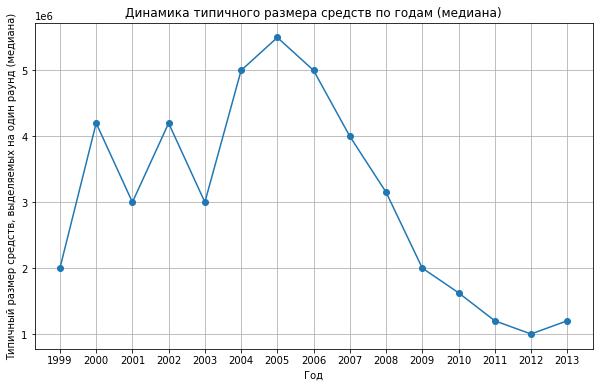

In [18]:

# Преобразуем столбец 'funded_at' в формат даты
company_and_rounds['funded_at'] = pd.to_datetime(company_and_rounds['funded_at'], errors='coerce')

# Извлекаеме год из даты
company_and_rounds['year'] = company_and_rounds['funded_at'].dt.year

summary_table = company_and_rounds.pivot_table(
    index='year',
    values='raised_amount',
    aggfunc=['median', 'count']
).reset_index()

# Переименуем столбцы сводной таблицы
summary_table.columns = ['year', 'median_raised_amount', 'total_rounds']

# Отфильтруем года с более чем 50 раундами финансирования
filtered_summary = summary_table[summary_table['total_rounds'] > 50]

# Построим график
plt.figure(figsize=(10, 6))
plt.plot(filtered_summary['year'], filtered_summary['median_raised_amount'], marker='o')
plt.title('Динамика типичного размера средств по годам (медиана)')
plt.xlabel('Год')
plt.ylabel('Типичный размер средств, выделяемых на один раунд (медиана)')
plt.grid()
plt.xticks(filtered_summary['year']) 
plt.show()

<div class="alert alert-primary">
<b>По графику видно что в начале 2000 годов размер средств выделяемых на 1 раунд финансирования колебался, но потом в течение двух лет шел в верх с последующим падением вплоть до 2012 года. С 2012 года замечен небольшой рост финансирования.</b> 
</div>


### 2.2. Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

* Оцените, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделите все компании на несколько групп по количеству сотрудников и оцените среднюю долю сотрудников без информации об образовании в каждой из групп. Обоснуйте выбранные границы групп.

* Оцените, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

In [19]:

display(education.columns) #Проверка
display(people.columns) #Проверка
 

Index(['id', 'person_id', 'instituition', 'graduated_at'], dtype='object')

Index(['id', 'first_name', 'last_name', 'company_id', 'network_username'], dtype='object')

In [20]:
#Объединение данных людей и компаний
merged_data = pd.merge(people, education, left_on='id', right_on='person_id', how='left')

In [21]:
# Удаляем дубликаты сотрудников по company_id и person_id (или любому уникальному идентификатору сотрудника)
unique_people = people.drop_duplicates(subset=['company_id', 'id'])
# Подсчитаем сотрудников в каждой компании
company_sizes = people.groupby('company_id').size().reset_index(name='employee_count')

# Объединим размер компании с merged_data
merged_data = merged_data.merge(company_sizes, left_on='company_id', right_on='company_id', how='left')


In [22]:
# Определяем, есть ли информация об образовании
merged_data['has_education'] = merged_data['graduated_at'].notnull()

# Подсчитаем количество сотрудников без информации об образовании
education_summary = merged_data.groupby('employee_count').agg(
    total_employees=('person_id', 'count'),
    employees_without_education=('has_education', lambda x: (x == False).sum())
).reset_index()

# Рассчитаем долю сотрудников без образования
education_summary['proportion_without_education'] = education_summary['employees_without_education'] / education_summary['total_employees']

display(education_summary)


,employee_count,total_employees,employees_without_education,proportion_without_education
0,1.0,14911,11606,0.778352
1,2.0,4399,3632,0.825642
2,3.0,2243,1994,0.888988
3,4.0,1449,1342,0.926156
4,5.0,865,895,1.034682
5,6.0,604,645,1.067881
6,7.0,563,581,1.031972
7,8.0,347,384,1.106628
8,9.0,310,352,1.135484
9,10.0,163,187,1.147239


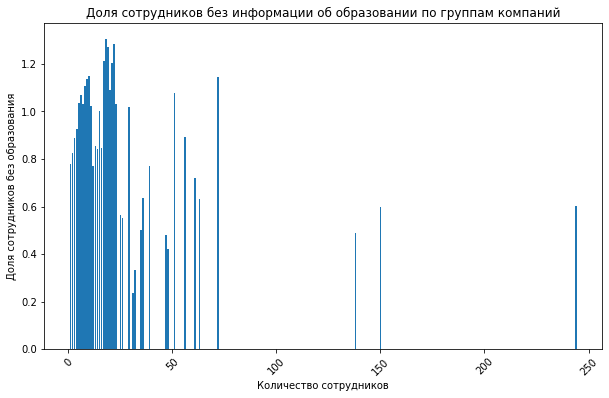

In [23]:
# Построим график
plt.figure(figsize=(10, 6))
plt.bar(education_summary['employee_count'], education_summary['proportion_without_education'])
plt.xlabel('Количество сотрудников')
plt.ylabel('Доля сотрудников без образования')
plt.title('Доля сотрудников без информации об образовании по группам компаний')
plt.xticks(rotation=45)
plt.show()



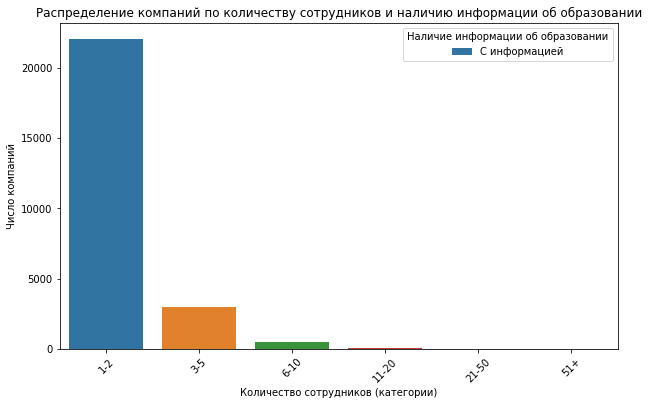

In [24]:
education_summary = merged_data.groupby(['company_id', 'has_education']).size().reset_index(name='employee_count')

# Определяем границы и метки
bins = [0, 3, 6, 11, 21, 51, 1000]  # 6 границ
labels = ['1-2', '3-5', '6-10', '11-20', '21-50', '51+']  # 6 меток

# Создаем категории для employee_count
education_summary['employee_bins'] = pd.cut(education_summary['employee_count'], bins=bins, labels=labels, right=False)

# Теперь можно построить график
plt.figure(figsize=(10, 6))
sns.countplot(data=education_summary, x='employee_bins')
plt.xlabel('Количество сотрудников (категории)')
plt.ylabel('Число компаний')
plt.title('Распределение компаний по количеству сотрудников и наличию информации об образовании')
plt.xticks(rotation=45)
plt.legend(title='Наличие информации об образовании', loc='upper right', labels=['С информацией', 'Без информации'])
plt.show()

<div class="alert alert-primary">
<b>По графику можно сказать, что большинство стартапов состоит из 1-2 человек, количество компаний больше 20 человек в составе, почти нет. Да и состояших из 6 и более человек достаточно мало.</b> 
</div>

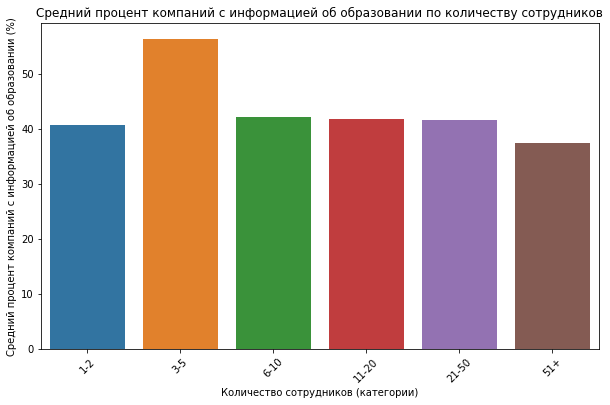

In [25]:
# Вычисляем доли
# Группируем по employee_bins и has_education, считаем количество
grouped = education_summary.groupby(['employee_bins', 'has_education']).size().unstack(fill_value=0)

# Вычисляем доли (процентное соотношение)
grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Вычисляем средний процент для каждой категории employee_bins
# Берем только столбец с информацией об образовании (например, has_education = True)
average_percentage = grouped_percentage[True]  # Замените True на нужное значение, если оно другое

# Построение графика
plt.figure(figsize=(10, 6))
sns.barplot(x=average_percentage.index, y=average_percentage.values)
plt.xlabel('Количество сотрудников (категории)')
plt.ylabel('Средний процент компаний с информацией об образовании (%)')
plt.title('Средний процент компаний с информацией об образовании по количеству сотрудников')
plt.xticks(rotation=45)
plt.show()

### 2.3. Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. И, например, в результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных, так как большая часть значений встречается в разных датасетах не один, а несколько раз. Этот столбец может быть использован для объединения данных.

* Установите, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.

* Оцените, можно ли использовать столбцы с именем `network_username` для объединения данных.

In [26]:
unique_netw = df['network_username'].unique()
unique_id = df['company_id'].unique()
display(unique_netw)  
display(unique_id) # Посмотрим уникальные значения ников компании и id компаний

array([nan, 'jobsbostontech', 'fbroulette', ..., 'itechsocialnet',
       'socialnethubs', 'esocialnetlike'], dtype=object)

array([5.00000e+00, 2.70000e+01, 2.92000e+02, ..., 8.36510e+04,
       1.88200e+05, 1.43419e+05])

In [27]:
# Проверяем названия столбцов
display(company_and_rounds.columns)
display(fund.columns)
display(people.columns)

# Объединяем три DataFrame по столбцу 'network_username'
merged_data = pd.concat([
    company_and_rounds[['network_username']], 
    fund[['network_username']],
    people[['network_username']]
], ignore_index=True)

# Проверим дубликаты
duplicate_counts = merged_data['network_username'].value_counts()

# Фильтруем только те, которые встречаются более одного раза
duplicates = duplicate_counts[duplicate_counts > 1]

# Выводим результаты
display(duplicates)

Index(['company_ID', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round', 'match', 'year'],
      dtype='object')

Index(['id', 'name', 'founded_at', 'domain', 'network_username',
       'country_code', 'investment_rounds', 'invested_companies',
       'milestones'],
      dtype='object')

Index(['id', 'first_name', 'last_name', 'company_id', 'network_username'], dtype='object')

Goodman_UK       20
IndiaMART        17
mobivery         15
tyropayments     15
AviirLabs        14
                 ..
tarynsullivan     2
Mytravelo         2
MarroneBio        2
abnamro           2
BizDevAngel       2
Name: network_username, Length: 10961, dtype: int64

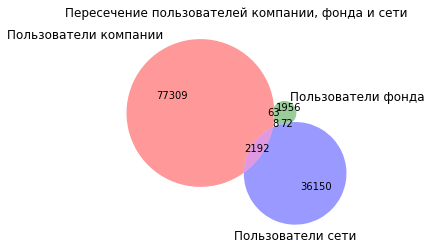

In [28]:
!pip install matplotlib-venn -q

from matplotlib_venn import venn3    # Берем три множества, проверим сразу 3 датасета

company_users = set(company_and_rounds['network_username'])  # Пользователи компании
fund_users = set(fund['network_username'])  # Пользователи фонда
network_users = set(people['network_username'])  # Пользователи сети

# Строим диаграмму Венна
venn3([company_users, fund_users, network_users], set_labels=('Пользователи компании', 'Пользователи фонда', 'Пользователи сети'))

# Отображаем график
plt.title("Пересечение пользователей компании, фонда и сети")
plt.show()

<div class="alert alert-primary">
<b>Столбцы network_username из разных датасетов неподходят для объединения, потому что они означают совсем разные вещи. network_username из датасета company_and_rounds - это ник компании в соцсетях, а network username из датасэта people - это ник человека в соцсетях, network username из датасета fund - это ник фонда финансирования в соцсетях. На основе этой информации можно с уверенностью сказать, что объединение по этим столбцам недопустипо. Если дубликаты и есть, то это могут быть просто совпадения. По графику видно, что среди общего количества данных, пересечений немного, объединять нет смысла.</b> 
</div>


### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна. Хотя информация об общем объёме финансирования по раундам присутствует в других датасетах, заказчик считает данные `company_and_rounds.csv` о размере средств наиболее верными.

* Любым удобным способом приведите данные в вид, который позволяет проводить анализ в разрезе отдельных компаний. Можно изменять форму данных, порядок их хранения. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

* Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовьте данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию.

In [29]:
# Просматриваем первые несколько строк таблицы и информацию о столбцах
display(company_and_rounds.head())
display(company_and_rounds.info())

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,match,year
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,True,2005.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,True,2007.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,True,2008.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 217472 entries, 0 to 217471
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_ID           217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

None

In [30]:
# Разделим один датасет на два (комании и раунды финансирования)

# Создаем DataFrame для информации о компаниях
company_info_columns = [
    'company_ID', 'name', 'category_code', 'status', 'founded_at', 'closed_at',
    'domain', 'network_username', 'country_code', 'investment_rounds', 'funding_rounds', 'funding_total', 'milestones'
]
company_info_df = company_and_rounds[company_info_columns].drop_duplicates()

# Создаем DataFrame для информации о раундах
rounds_info_columns = [
    'funding_round_id', 'company_id', 'funded_at', 'funding_round_type', 
    'raised_amount', 'pre_money_valuation', 'participants', 'is_first_round', 
    'is_last_round'
]
rounds_info_df = company_and_rounds[rounds_info_columns].drop_duplicates()

# Проверка на пропуски
display("Пропуски в таблице с информацией о компаниях:")
display(company_info_df.isnull().sum())
display("\nПропуски в таблице с информацией о раундах:")
display(rounds_info_df.isnull().sum())


# Сохранение новых DataFrame в CSV    (Пусть будет)
company_info_df.to_csv('company_info.csv', index=False)
rounds_info_df.to_csv('rounds_info.csv', index=False)

'Пропуски в таблице с информацией о компаниях:'

company_ID                0
name                      0
category_code         73367
status                    0
founded_at           105326
closed_at            193933
domain                70008
network_username     115962
country_code         108563
investment_rounds         0
funding_rounds            0
funding_total             0
milestones                0
dtype: int64

'\nПропуски в таблице с информацией о раундах:'

funding_round_id         1
company_id               1
funded_at              245
funding_round_type       1
raised_amount            1
pre_money_valuation      1
participants             1
is_first_round           1
is_last_round            1
dtype: int64

In [31]:
display(company_info_df.head())
display(company_info_df.info())
display(rounds_info_df.head())
display(rounds_info_df.info())

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0
5,10000.0,MYWEBBO,network_hosting,operating,2008-07-26,NaT,mywebbo.com,NaN,NaN,0.0,0.0,0.0,0.0
6,10001.0,THE Movie Streamer,games_video,operating,2008-07-26,NaT,themoviestreamer.com,NaN,NaN,0.0,0.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 196553 entries, 0 to 217469
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_ID         196553 non-null  float64       
 1   name               196553 non-null  object        
 2   category_code      123186 non-null  object        
 3   status             196553 non-null  object        
 4   founded_at         91227 non-null   datetime64[ns]
 5   closed_at          2620 non-null    datetime64[ns]
 6   domain             126545 non-null  object        
 7   network_username   80591 non-null   object        
 8   country_code       87990 non-null   object        
 9   investment_rounds  196553 non-null  float64       
 10  funding_rounds     196553 non-null  float64       
 11  funding_total      196553 non-null  float64       
 12  milestones         196553 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)


None

,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
15,1644.0,1001.0,2008-02-26,series-a,5000000.0,0.0,3.0,1.0,1.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 52627 entries, 0 to 217471
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   funding_round_id     52626 non-null  float64       
 1   company_id           52626 non-null  float64       
 2   funded_at            52382 non-null  datetime64[ns]
 3   funding_round_type   52626 non-null  object        
 4   raised_amount        52626 non-null  float64       
 5   pre_money_valuation  52626 non-null  float64       
 6   participants         52626 non-null  float64       
 7   is_first_round       52626 non-null  float64       
 8   is_last_round        52626 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 4.0+ MB


None

<div class="alert alert-primary">
<b>Теперь на основе полученных данных, мы можем сделать более качественный анализ.</b> 
</div>


## Шаг 3. Исследовательский анализ объединённых таблиц

<big>Приступите к шагу 3 после проверки ревьюера.</big>


### 3.1. Объединение данных

Объедините данные для ответа на вопросы заказчика, которые касаются интересующих его компаний.

В качестве основы для объединённой таблицы возьмите данные из обработанного датасета `company_and_rounds.csv` — выберите только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, и те, у которых в колонке `status` указано `acquired`.

Далее работайте только с этими данными.

In [32]:

company_df = company_info_df[['company_ID', 'name', 'category_code', 'status',
    'founded_at', 'closed_at', 'domain', 'network_username',
    'country_code', 'investment_rounds', 'funding_rounds', 'funding_total']].copy()

filtered_company_df = company_info_df[
    ((company_df['funding_rounds'] > 0) |
    (company_df['investment_rounds'] > 0)) |
    (company_df['status'] == 'acquired')]

# Вывод первых нескольких строк итоговой таблицы
display(filtered_company_df.head(10))
display(filtered_company_df.info())


,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0
15,1001.0,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0.0,1.0,5000000.0,3.0
20,10014.0,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0.0,1.0,0.0,4.0
21,10015.0,Fitbit,health,operating,2007-10-01,NaT,fitbit.com,fitbit,USA,0.0,5.0,68069200.0,0.0
26,100155.0,MTPV,cleantech,operating,2003-01-01,NaT,mtpv.com,NaN,USA,0.0,3.0,10125300.0,1.0
32,10018.0,Demandbase,analytics,operating,2006-01-01,NaT,demandbase.com,Demandbase,USA,0.0,3.0,33000000.0,3.0
36,100189.0,Locatrix Communications,mobile,operating,2003-11-01,NaT,locatrix.com,NaN,AUS,0.0,1.0,250000.0,1.0
37,10020.0,Threebrix E-services Pvt Ltd,NaN,operating,NaT,NaT,NaN,NaN,NaN,1.0,0.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 40747 entries, 0 to 217469
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   company_ID         40747 non-null  float64       
 1   name               40747 non-null  object        
 2   category_code      35315 non-null  object        
 3   status             40747 non-null  object        
 4   founded_at         27807 non-null  datetime64[ns]
 5   closed_at          2128 non-null   datetime64[ns]
 6   domain             35754 non-null  object        
 7   network_username   20850 non-null  object        
 8   country_code       34742 non-null  object        
 9   investment_rounds  40747 non-null  float64       
 10  funding_rounds     40747 non-null  float64       
 11  funding_total      40747 non-null  float64       
 12  milestones         40747 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)
memory usage: 4.

None


### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

* По предобработанному столбцу `funding_total` графическим способом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.

* В процессе расчёта значений обратите внимание, например, на показатели, возвращаемые методом `.describe()`, — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений?

   Среднее значение и медиана могут дать представление о типичном размере финансирования. Если среднее значительно выше медианы, это может указывать на наличие выбросов.
   Ящик с усами поможет визуально определить выбросы. Значения, находящиеся за пределами "усов", считаются выбросами. Гистограмма также может показать, как распределены данные и есть ли длинные хвосты.

Таким образом, для анализа столбца funding_total можно использовать как статистические методы, так и визуализацию. Это поможет понять распределение данных, типичные значения и выбросы.


count    4.074700e+04
mean     1.013561e+07
std      5.646436e+07
min      0.000000e+00
25%      0.000000e+00
50%      6.000000e+05
75%      5.650650e+06
max      5.700000e+09
Name: funding_total, dtype: float64

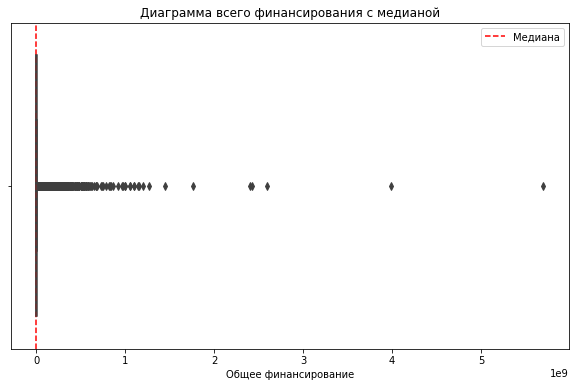

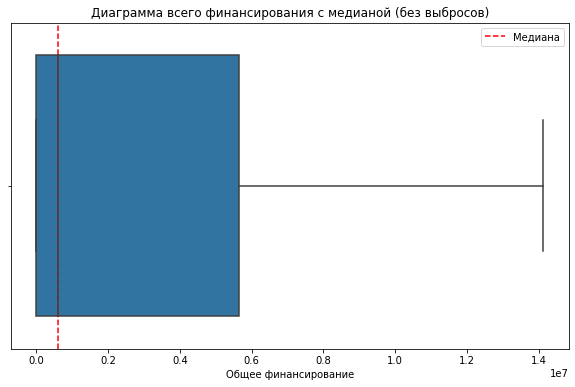

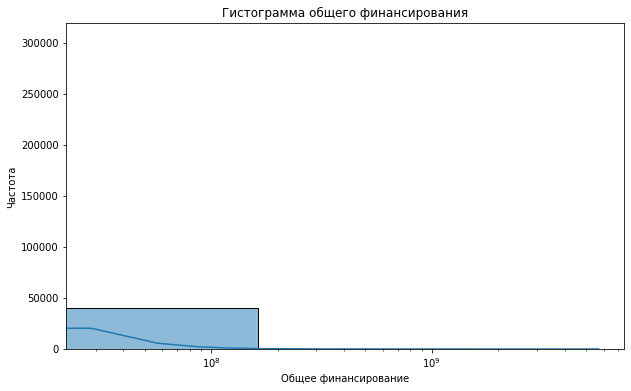

In [33]:
summary = filtered_company_df['funding_total'].describe()    # Посмотрим сводку значений
display(summary)     #Псмотрим значения
# Усы с выбросами
plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_company_df['funding_total'])
plt.axvline(summary['50%'], color='red', linestyle='--', label='Медиана')
plt.title('Диаграмма всего финансирования с медианой')
plt.xlabel('Общее финансирование')
plt.legend()
plt.show()

# Усы без выбросов (посмотреть)
plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_company_df['funding_total'], showfliers=False)
plt.axvline(summary['50%'], color='red', linestyle='--', label='Медиана')
plt.title('Диаграмма всего финансирования с медианой (без выбросов)')
plt.xlabel('Общее финансирование')
plt.legend()
plt.show()

# Гистограмма с лого шкалой
plt.figure(figsize=(10, 6))
sns.histplot(filtered_company_df['funding_total'], bins=35, kde=True)
plt.xscale('log')  # Применяем логарифмическую шкалу
plt.title('Гистограмма общего финансирования')
plt.xlabel('Общее финансирование')
plt.ylabel('Частота')
plt.show()



count    4.074700e+04
mean     1.013561e+07
std      5.646436e+07
min      0.000000e+00
25%      0.000000e+00
50%      6.000000e+05
75%      5.650650e+06
max      5.700000e+09
Name: funding_total, dtype: float64

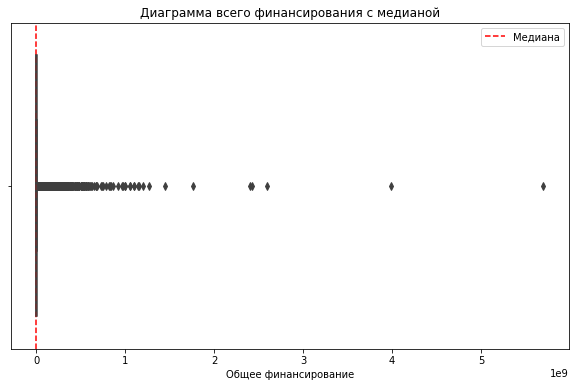

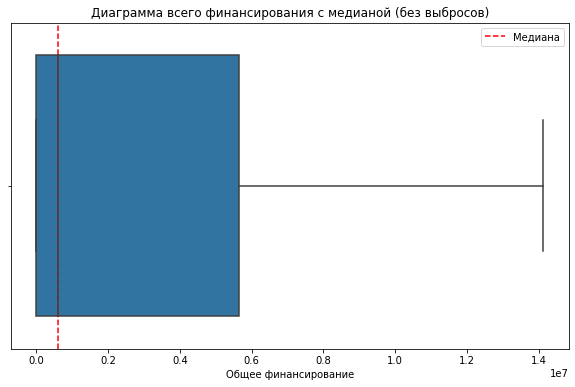

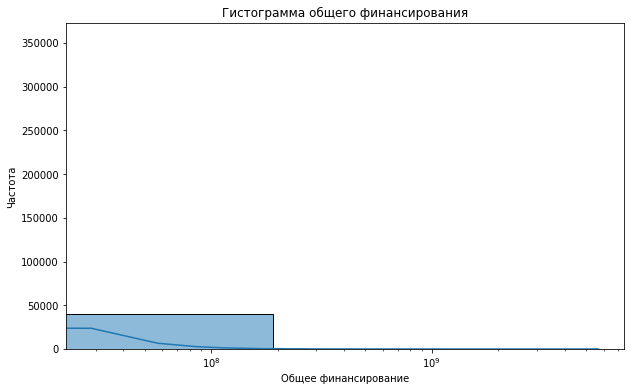

In [34]:
summary = filtered_company_df['funding_total'].describe()    # Посмотрим сводку значений
display(summary)     #Псмотрим значения
# Усы с выбросами
plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_company_df['funding_total'])
plt.axvline(summary['50%'], color='red', linestyle='--', label='Медиана')
plt.title('Диаграмма всего финансирования с медианой')
plt.xlabel('Общее финансирование')
plt.legend()
plt.show()

# Усы без выбросов (посмотреть)
plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_company_df['funding_total'], showfliers=False)
plt.axvline(summary['50%'], color='red', linestyle='--', label='Медиана')
plt.title('Диаграмма всего финансирования с медианой (без выбросов)')
plt.xlabel('Общее финансирование')
plt.legend()
plt.show()

# Гистограмма с лого шкалой
plt.figure(figsize=(10, 6))
sns.histplot(filtered_company_df['funding_total'], bins=30, kde=True)
plt.xscale('log')  # Применяем логарифмическую шкалу
plt.title('Гистограмма общего финансирования')
plt.xlabel('Общее финансирование')
plt.ylabel('Частота')
plt.show()




### 3.3. Куплены забесплатно?

* Исследуйте компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

* Рассчитайте аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажите, каким процентилям границы соответствуют. Учитывая озвученные выше предпосылки и собственные соображения, сделайте выводы о корректности планируемой заказчиком замены нижней и верхней границы выбросов на значения, рассчитанные по процентилям.

In [35]:
merged_df = pd.merge(acquisition, filtered_company_df, left_on='acquired_company_id', right_on='company_ID', how='inner')
companies_sold_zero_or_one_dollar = merged_df[
    (merged_df.status == "acquired") &
    (merged_df.price_amount < 2) &
    (merged_df.funding_total != 0)
]

# Вывод количества таких компаний
display("Количество компаний, проданных за 0 или 1 доллар с ненулевым объемом финансирования:", len(companies_sold_zero_or_one_dollar))

'Количество компаний, проданных за 0 или 1 доллар с ненулевым объемом финансирования:'

1618

In [36]:

# Расчет квартилей и IQR
Q1 = merged_df['funding_total'].quantile(0.25)
Q3 = merged_df['funding_total'].quantile(0.75)
IQR = Q3 - Q1

# Определение границ выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Заменяем отрицательные значения на 0
if lower_bound < 0:
    lower_bound = 0
# Заменяем отрицательные значения на 0
if upper_bound < 0:
    upper_bound = 0


display(f"Нижняя граница выбросов: {lower_bound}")
display(f"Верхняя граница выбросов: {upper_bound}")

'Нижняя граница выбросов: 0'

'Верхняя граница выбросов: 9843.75'

In [37]:
from scipy import stats

# Вычисление процентиля для нижней границы
lower_percentile = stats.percentileofscore(merged_df['funding_total'], lower_bound)
upper_percentile = stats.percentileofscore(merged_df['funding_total'], upper_bound)

display(f"Нижняя граница выбросов соответствует {lower_percentile} процентилю.")
display(f"Верхняя граница выбросов соответствует {upper_percentile} процентилю.")

'Нижняя граница выбросов соответствует 37.49733759318424 процентилю.'

'Верхняя граница выбросов соответствует 75.00532481363152 процентилю.'


### 3.4. Цены стартапов по категориям

Категории стартапов с наибольшими ценами и значительным разбросом цен могут быть наиболее привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

* наибольшими ценами;
* и наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

In [38]:
category_stats = merged_df.groupby('category_code').agg(
    average_price=('price_amount', 'median'),
    price_stddev=('price_amount', 'std')
).reset_index()

# Наиболее привлекательные категории с наибольшей средней ценой
top_categories_by_average_price = category_stats.sort_values(by='average_price', ascending=False)

# Наиболее привлекательные категории с наибольшим разбросом цен
top_categories_by_price_stddev = category_stats.sort_values(by='price_stddev', ascending=False)

# Вывод результатов
display("Категории с наибольшими ценами:")
display(top_categories_by_average_price.head())

display("\nКатегории с наибольшим разбросом цен:")
display(top_categories_by_price_stddev.head())

'Категории с наибольшими ценами:'

,category_code,average_price,price_stddev
23,nanotech,584000000,NaN
18,manufacturing,72000000,9.696580e+08
30,real_estate,50000000,2.505123e+09
2,automotive,43000000,2.297758e+09
3,biotech,13200000,1.540374e+09


'\nКатегории с наибольшим разбросом цен:'

,category_code,average_price,price_stddev
9,enterprise,0,1.280882e+11
29,public_relations,0,4.059244e+09
30,real_estate,50000000,2.505123e+09
2,automotive,43000000,2.297758e+09
3,biotech,13200000,1.540374e+09



### 3.5. Сколько раундов продержится стартап перед покупкой

* Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.

* Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

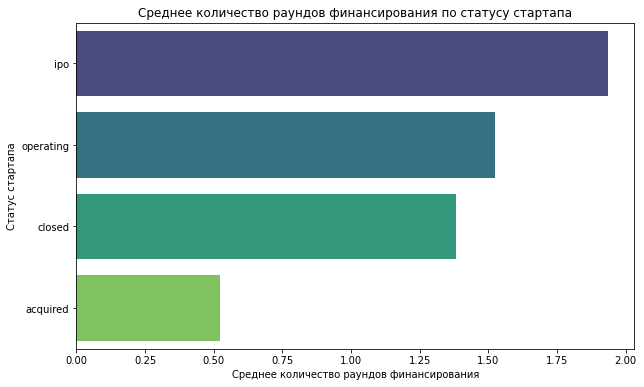

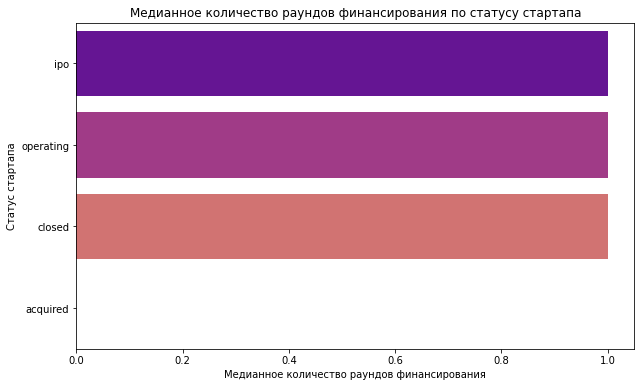

,status,mean_funding_rounds,median_funding_rounds
2,ipo,1.934375,1.0
3,operating,1.522658,1.0
1,closed,1.381453,1.0
0,acquired,0.523526,0.0


In [39]:
# Группировка данных по статусу и расчет среднего и медианного количества раундов
status_funding_rounds = filtered_company_df.groupby('status')['funding_rounds'].agg(['mean', 'median']).reset_index()

# Переименование столбцов для удобства
status_funding_rounds.columns = ['status', 'mean_funding_rounds', 'median_funding_rounds']

# Сортировка по среднему количеству раундов
status_funding_rounds = status_funding_rounds.sort_values(by='mean_funding_rounds', ascending=False)

# Визуализация среднего количества раундов
plt.figure(figsize=(10, 6))
sns.barplot(x='mean_funding_rounds', y='status', data=status_funding_rounds, palette='viridis')
plt.title('Среднее количество раундов финансирования по статусу стартапа')
plt.xlabel('Среднее количество раундов финансирования')
plt.ylabel('Статус стартапа')
plt.show()

# Визуализация медианного количества раундов
plt.figure(figsize=(10, 6))
sns.barplot(x='median_funding_rounds', y='status', data=status_funding_rounds, palette='plasma')
plt.title('Медианное количество раундов финансирования по статусу стартапа')
plt.xlabel('Медианное количество раундов финансирования')
plt.ylabel('Статус стартапа')
plt.show()

# Вывод результатов
display(status_funding_rounds)


## Шаг 4. Итоговый вывод и рекомендации

Опишите, что было сделано в проекте, какие были сделаны выводы, подкрепляют ли они друг друга или заставляют сомневаться в полученных результатах.

В данном проекте были проведены исследования данных предоставленных заказчиком. Данные требовали значительных преобразований, из-за их "корявости". Были созданы несколько дополнительных датасетов из другого. Проанализовароны раунды финансирования и сделаны выводы как это может влиять на стартапы. Но чтобы быть более уверенными, я считаю что надо смотреть источник данных, потому что предоставленные данные были коряво объеденины, что может служить искривлению результатов. Если данные были предоставлены некорректные, то все наши выводы могут оказаться неправильными. 
Рекомендации: Инвесторы могут использовать полученную от нас информацию для оценки рисков и возможностей, связанных с различными статусами стартапов. Стартапы с большим количеством раундов могут быть более зрелыми и готовыми к расширению, в то время как стартапы с меньшим количеством раундов могут представлять более высокий риск, но и потенциально более высокую прибыль (надо дополнительно исследовать именно те стартапы, которые имеют мало раундов финанисрования, может там есть что-то, что сделает их очень прибыльными).